In [1]:
import csv, os, requests, time, gmaps, pandas as pd, matplotlib.pyplot as plt, numpy as np
from config import *
gmaps.configure(api_key=gkey)
from scipy.stats import linregress

In [2]:
yelpapi_csv = os.path.join("yelpapidata.csv")
yelp_raw = pd.read_csv(yelpapi_csv)
yelp_raw.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,149,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/V0mJrf...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466
3,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,18,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287
4,"Montgomery, Alabama",American,zCrHEgY50cCvoityLJYuIQ,Martin's Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/fswGCG...,https://www.yelp.com/biz/martins-restaurant-mo...,False,111,4.0,$,32.358297,-86.283060,1796 Carter Hill Rd,Montgomery,AL,36106,US,(334) 265-1767


In [3]:
yelp_raw.describe()

,review_count,rating,lat,long
count,27756.000000,27756.000000,27756.000000,27756.000000
mean,180.800440,3.960873,38.446198,-92.914868
std,295.739555,0.609287,5.165000,18.802159
min,1.000000,1.000000,21.262370,-158.060137
25%,31.000000,3.500000,35.498015,-104.921405
50%,90.000000,4.000000,39.674444,-89.292299
75%,218.000000,4.500000,41.823425,-78.503808
max,9625.000000,5.000000,58.398782,157.941630


In [4]:
yelp_format_rd1 = yelp_raw.copy()
#yelp_format_rd1["review_count"] = yelp_format_rd1.loc[:, "review_count"].astype(float)
#yelp_format_rd1["rating"] = yelp_format_rd1.loc[:, "rating"].astype(float)
yelp_format_rd1['price_attribute'] = yelp_format_rd1['price'].replace(
    {'$': '1.Affordable', '$$': '2.Moderate', '$$$': '3.Expensive'})
yelp_format_rd1.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,149,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801,1.Affordable
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/V0mJrf...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575,1.Affordable
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466,2.Moderate
3,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,18,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287,1.Affordable
4,"Montgomery, Alabama",American,zCrHEgY50cCvoityLJYuIQ,Martin's Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/fswGCG...,https://www.yelp.com/biz/martins-restaurant-mo...,False,111,4.0,$,32.358297,-86.283060,1796 Carter Hill Rd,Montgomery,AL,36106,US,(334) 265-1767,1.Affordable


In [5]:
yelp_format_rd1.columns

Index(['search_city', 'search_cuisine', 'y_id', 'name', 'image_url', 'url',
       'closed', 'review_count', 'rating', 'price', 'lat', 'long', 'add1',
       'city', 'state', 'zip_code', 'country', 'disp_ph', 'price_attribute'],
      dtype='object')

In [6]:
yelp_format_rd1.count()

search_city        27756
search_cuisine     27756
y_id               27756
name               27756
image_url          27473
url                27756
closed             27756
review_count       27756
rating             27756
price              23647
lat                27756
long               27756
add1               27393
city               27756
state              27756
zip_code           27724
country            27756
disp_ph            27222
price_attribute    23647
dtype: int64

In [7]:
yelp_format_rd1.dtypes

search_city         object
search_cuisine      object
y_id                object
name                object
image_url           object
url                 object
closed                bool
review_count         int64
rating             float64
price               object
lat                float64
long               float64
add1                object
city                object
state               object
zip_code            object
country             object
disp_ph             object
price_attribute     object
dtype: object

In [8]:
yelp_gb_cities = yelp_format_rd1.groupby(['search_city'])
yelp_gb_cities.sum().head()

,closed,review_count,rating,lat,long
search_city,,,,,
"Albany, New York",False,61601,2487.0,27156.100465,-46929.660150
"Annapolis, Maryland",False,102460,2051.5,20882.125489,-40971.282851
"Atlanta, Georgia",False,293928,3852.0,32416.546153,-80809.324515
"Augusta, Maine",False,15646,1005.0,11564.080196,-18132.584960
"Austin, Texas",False,312557,3841.0,28052.212441,-90416.685977


In [9]:
yelp_gb_cuisines = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisines.sum().head()

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,1.0,692463,9439.0,93624.799049,-222739.166610
Cajun,0.0,347935,5457.0,53353.339265,-133277.014460
Caribbean,0.0,93810,3252.0,31277.396628,-71256.759163
Chinese,0.0,214779,6998.0,73178.068736,-177673.164472
French,0.0,253181,4444.0,42419.862185,-103596.247204


In [10]:
yelp_gb_price = yelp_format_rd1.groupby(['price'])
yelp_gb_price.sum().head()

,closed,review_count,rating,lat,long
price,,,,,
$,3.0,771014,26107.5,258004.077400,-6.192902e+05
$$,1.0,3813467,62256.0,608947.397742,-1.482875e+06
$$$,0.0,326364,3977.5,37834.955417,-9.100016e+04
$$$$,0.0,30350,432.5,3801.420460,-9.993254e+03
££,0.0,4,4.0,51.348274,-2.315577e+00


In [11]:
yelp_gb_citiescount = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiescount.count().head()

,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
search_city,,,,,,,,,,,,,,,,,,
"Albany, New York",636,636,636,627,636,636,636,636,525,636,636,631,636,636,636,636,626,525
"Annapolis, Maryland",535,535,535,534,535,535,535,535,468,535,535,530,535,535,535,535,531,468
"Atlanta, Georgia",958,958,958,956,958,958,958,958,858,958,958,955,958,958,958,958,946,858
"Augusta, Maine",261,261,261,250,261,261,261,261,210,261,261,261,261,261,261,261,259,210
"Austin, Texas",925,925,925,922,925,925,925,925,780,925,925,914,925,925,924,925,901,780


In [12]:
yelp_gb_cuisinescount = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinescount.count().head()

,search_city,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
search_cuisine,,,,,,,,,,,,,,,,,,
American,2395,2395,2395,2378,2395,2395,2395,2395,2117,2395,2395,2393,2395,2395,2395,2395,2345,2117
Cajun,1420,1420,1420,1406,1420,1420,1420,1420,1185,1420,1420,1395,1420,1420,1419,1420,1386,1185
Caribbean,811,811,811,786,811,811,811,811,552,811,811,761,811,811,808,811,784,552
Chinese,1906,1906,1906,1882,1906,1906,1906,1906,1705,1906,1906,1905,1906,1906,1905,1906,1890,1705
French,1099,1099,1099,1092,1099,1099,1099,1099,1004,1099,1099,1093,1099,1099,1098,1099,1080,1004


In [13]:
yelp_gb_citiesavg = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiesavg.mean().head()

,closed,review_count,rating,lat,long
search_city,,,,,
"Albany, New York",0.0,96.856918,3.910377,42.698271,-73.788774
"Annapolis, Maryland",0.0,191.514019,3.834579,39.032010,-76.581837
"Atlanta, Georgia",0.0,306.814196,4.020877,33.837731,-84.352113
"Augusta, Maine",0.0,59.946360,3.850575,44.306821,-69.473506
"Austin, Texas",0.0,337.899459,4.152432,30.326716,-97.747769


In [14]:
yelp_gb_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinesavg.mean().head()

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,0.000418,289.128601,3.941127,39.091774,-93.001740
Cajun,0.000000,245.024648,3.842958,37.572774,-93.857052
Caribbean,0.000000,115.672010,4.009864,38.566457,-87.862835
Chinese,0.000000,112.685729,3.671563,38.393530,-93.217820
French,0.000000,230.373976,4.043676,38.598601,-94.264101


In [15]:
yelp_gb2_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb2_citiesavg.mean().head()

closed  review_count    rating        lat  \
search_city      search_cuisine                                              
Albany, New York American           0.0    156.540000  3.970000  42.680014   
                 Cajun              0.0    138.608696  3.695652  42.711436   
                 Caribbean          0.0     21.347826  3.586957  42.701971   
                 Chinese            0.0     86.840000  3.540000  42.687306   
                 French             0.0     71.000000  3.961538  42.695954   

                                      long  
search_city      search_cuisine             
Albany, New York American       -73.783655  
                 Cajun          -73.782933  
                 Caribbean      -73.792820  
                 Chinese        -73.795018  
                 French         -73.775176

In [16]:
yelp_gb2_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb2_cuisinesavg.mean().head()

closed  review_count  rating        lat  \
search_cuisine search_city                                                    
American       Albany, New York        0.0        156.54    3.97  42.680014   
               Annapolis, Maryland     0.0        296.74    3.88  38.977850   
               Atlanta, Georgia        0.0        778.16    4.13  33.799646   
               Augusta, Maine          0.0         49.96    3.86  44.362836   
               Austin, Texas           0.0        736.90    4.16  30.323516   

                                         long  
search_cuisine search_city                     
American       Albany, New York    -73.783655  
               Annapolis, Maryland -76.504242  
               Atlanta, Georgia    -84.375295  
               Augusta, Maine      -69.755858  
               Austin, Texas       -97.748273

In [17]:
yelp_gb3_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb3_citiesavg.mean().head()

closed  review_count    rating        lat  \
search_city      search_cuisine                                              
Albany, New York American           0.0    156.540000  3.970000  42.680014   
                 Cajun              0.0    138.608696  3.695652  42.711436   
                 Caribbean          0.0     21.347826  3.586957  42.701971   
                 Chinese            0.0     86.840000  3.540000  42.687306   
                 French             0.0     71.000000  3.961538  42.695954   

                                      long  
search_city      search_cuisine             
Albany, New York American       -73.783655  
                 Cajun          -73.782933  
                 Caribbean      -73.792820  
                 Chinese        -73.795018  
                 French         -73.775176

In [18]:
yelp_gb3_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb3_cuisinesavg.mean().head()

closed  review_count  rating        lat  \
search_cuisine search_city                                                    
American       Albany, New York        0.0        156.54    3.97  42.680014   
               Annapolis, Maryland     0.0        296.74    3.88  38.977850   
               Atlanta, Georgia        0.0        778.16    4.13  33.799646   
               Augusta, Maine          0.0         49.96    3.86  44.362836   
               Austin, Texas           0.0        736.90    4.16  30.323516   

                                         long  
search_cuisine search_city                     
American       Albany, New York    -73.783655  
               Annapolis, Maryland -76.504242  
               Atlanta, Georgia    -84.375295  
               Augusta, Maine      -69.755858  
               Austin, Texas       -97.748273

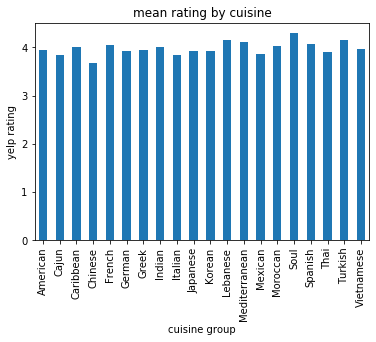

<Figure size 432x288 with 0 Axes>

In [19]:
chartme1 = yelp_gb_cuisinesavg['rating'].mean()
cuisine_chart = chartme1.plot(kind='bar', title='mean rating by cuisine')
cuisine_chart.set_xlabel("cuisine group")
cuisine_chart.set_ylabel("yelp rating")

plt.show()
plt.tight_layout()

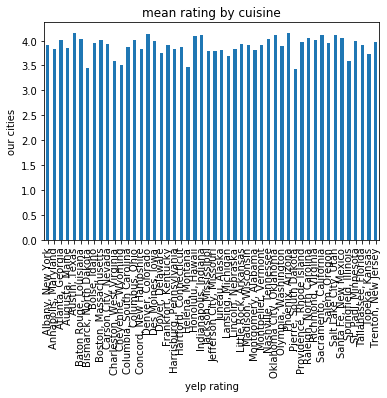

<Figure size 432x288 with 0 Axes>

In [20]:
chartme2 = yelp_gb_citiesavg['rating'].mean()
cuisine_chart = chartme2.plot(kind='bar', title='mean rating by cuisine')
cuisine_chart.set_xlabel("yelp rating")
cuisine_chart.set_ylabel('our cities')

plt.show()
plt.tight_layout()

In [21]:
yelp_gb_c = yelp_gb_cuisinescount['search_cuisine']
yelp_gb_c.count()

search_cuisine
American         2395
Cajun            1420
Caribbean         811
Chinese          1906
French           1099
German            587
Greek            1488
Indian           1104
Italian          2194
Japanese         1737
Korean           1479
Lebanese          763
Mediterranean    1280
Mexican          2149
Moroccan          389
Soul             2013
Spanish          1005
Thai             1736
Turkish           793
Vietnamese       1408
Name: search_cuisine, dtype: int64

In [22]:
# Labels for the sections of our pie chart
food_type = yelp_format_rd1['search_cuisine'].unique()
food_type

variable = yelp_gb_cuisinescount['review_count'].sum()
variable
#cuisines_labels = yelp_format_rd1.groupby(['search_cuisine'])['review_count']
#cuisines_labels.head()

# The values of each section of the pie chart

#sizes = yelp_gb_cuisinescount['review_count']


# Tells matplotlib to seperate the "Python" section from the others


search_cuisine
American         692463
Cajun            347935
Caribbean         93810
Chinese          214779
French           253181
German           148804
Greek            198145
Indian           183370
Italian          399452
Japanese         340025
Korean           259128
Lebanese         156248
Mediterranean    199034
Mexican          332701
Moroccan          81955
Soul             202100
Spanish          208886
Thai             299501
Turkish          159128
Vietnamese       247652
Name: review_count, dtype: int64

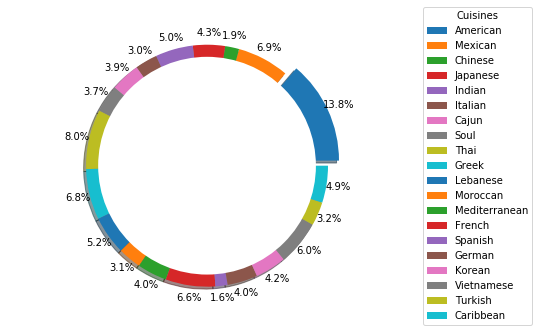

In [23]:
#actual pie chart showing which cusine is represented by reviews
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
#plt.title('Cusine % Comparison')
plt.pie(variable, labels=None,pctdistance=1.10, autopct="%1.1f%%", shadow=True, startangle= 0, explode=explode)
centre_circle = plt.Circle((0,0),0.90,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') 
plt.tight_layout()
plt.legend(food_type,
           title="Cuisines",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('donut.png')
plt.show()

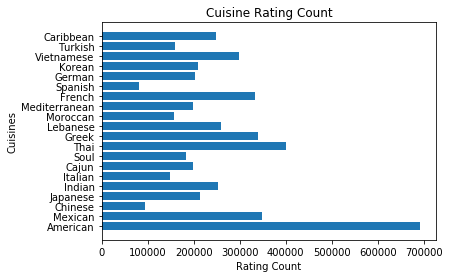

In [24]:
plt.barh(food_type,variable, align='center')
plt.xlabel('Rating Count')
plt.ylabel('Cuisines')
plt.title('Cuisine Rating Count')

plt.savefig('hbar.png', dpi=100)
plt.show()


In [25]:
food_data = yelp_format_rd1
food_data

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,149,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801,1.Affordable
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/V0mJrf...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575,1.Affordable
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466,2.Moderate
3,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,18,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287,1.Affordable
4,"Montgomery, Alabama",American,zCrHEgY50cCvoityLJYuIQ,Martin's Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/fswGCG...,https://www.yelp.com/biz/martins-restaurant-mo...,False,111,4.0,$,32.358297,-86.283060,1796 Carter Hill Rd,Montgomery,AL,36106,US,(334) 265-1767,1.Affordable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27751,"Cheyenne, Wyoming",Vietnamese,Xr_UtPKedDyleG_MSHvK-Q,Empire Express,https://s3-media1.fl.yelpcdn.com/bphoto/_feANw...,https://www.yelp.com/biz/empire-express-laport...,False,31,2.0,$,40.657480,-105.160399,3300 W County Rd,Laporte,CO,80535,US,(970) 493-2663,1.Affordable
27752,"Cheyenne, Wyoming",Vietnamese,FS9UR3iy80xk4CityY-plw,College Cafe,https://s3-media1.fl.yelpcdn.com/bphoto/0GxxFZ...,https://www.yelp.com/biz/college-cafe-fort-col...,False,22,3.0,$,40.578299,-105.077356,647 S College Ave,Fort Collins,CO,80524,US,(970) 221-2696,1.Affordable
27753,"Cheyenne, Wyoming",Turkish,zzeqVazbBK6-drbYWWLR9A,Petra Grill Mediterranean Cuisine,https://s3-media2.fl.yelpcdn.com/bphoto/LtyGPN...,https://www.yelp.com/biz/petra-grill-mediterra...,False,184,4.0,$$,40.574059,-105.100014,1335 W Elizabeth St,Fort Collins,CO,80521,US,(970) 568-8381,2.Moderate
27754,"Cheyenne, Wyoming",Turkish,M2a9ML_cYBfjqwR9zxRYLg,Tikka Grill,https://s3-media2.fl.yelpcdn.com/bphoto/Xs6eqt...,https://www.yelp.com/biz/tikka-grill-fort-coll...,False,49,4.5,$,40.574839,-105.099282,1240 W Elizabeth St,Fort Collins,CO,80521,US,(970) 698-6022,1.Affordable


In [26]:
only_city = food_data.loc[food_data['search_city'] == 'Montgomery, Alabama', :]
only_city


,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,149,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801,1.Affordable
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/V0mJrf...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575,1.Affordable
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466,2.Moderate
3,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,18,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287,1.Affordable
4,"Montgomery, Alabama",American,zCrHEgY50cCvoityLJYuIQ,Martin's Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/fswGCG...,https://www.yelp.com/biz/martins-restaurant-mo...,False,111,4.0,$,32.358297,-86.283060,1796 Carter Hill Rd,Montgomery,AL,36106,US,(334) 265-1767,1.Affordable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,"Montgomery, Alabama",Turkish,4qX7Gf-KPmrimmHdcTnrkA,Bates House of Turkey,https://s3-media1.fl.yelpcdn.com/bphoto/Tco-SS...,https://www.yelp.com/biz/bates-house-of-turkey...,False,81,3.5,$,31.851790,-86.642010,1001 Fort Dale Rd,Greenville,AL,36037,US,(334) 382-6123,1.Affordable
368,"Montgomery, Alabama",Caribbean,8GSuLA1nKMJRf_a0xKR80w,Island Delight at Dexter,https://s3-media2.fl.yelpcdn.com/bphoto/5x2snI...,https://www.yelp.com/biz/island-delight-at-dex...,False,67,4.5,$$,32.377351,-86.308322,36 Dexter Ave,Montgomery,AL,36104,US,(334) 356-5641,2.Moderate
369,"Montgomery, Alabama",Caribbean,B3L_WQk66myKWJcL1Y2pqg,Island Delight Caribbean Restaurant,https://s3-media4.fl.yelpcdn.com/bphoto/KPQQnc...,https://www.yelp.com/biz/island-delight-caribb...,False,41,4.5,$,32.367615,-86.348618,323 Air Base Blvd,Montgomery,AL,36108,US,(334) 264-0041,1.Affordable
370,"Montgomery, Alabama",Caribbean,-YHd5XOit-gDNvelcGCGbw,D' Road Cafe,https://s3-media4.fl.yelpcdn.com/bphoto/Ny0iK_...,https://www.yelp.com/biz/d-road-cafe-montgomer...,False,196,4.5,$$,32.376970,-86.309962,121 Montgomery St,Montgomery,AL,36104,US,(334) 328-2938,2.Moderate


In [27]:
city_food = only_city.groupby(['search_cuisine']).mean()
city_food

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,False,65.800000,3.960000,32.355351,-86.242625
Cajun,False,81.761905,3.738095,32.383732,-86.276150
Caribbean,False,77.000000,4.500000,32.436182,-86.104212
Chinese,False,22.386364,3.545455,32.397951,-86.251610
French,False,95.333333,3.833333,32.344876,-86.212655
German,False,14.000000,4.000000,32.479502,-86.369687
Greek,False,40.100000,3.800000,32.383671,-86.237580
Indian,False,58.750000,4.250000,32.475869,-85.829463
Italian,False,57.900000,3.340000,32.412304,-86.219686


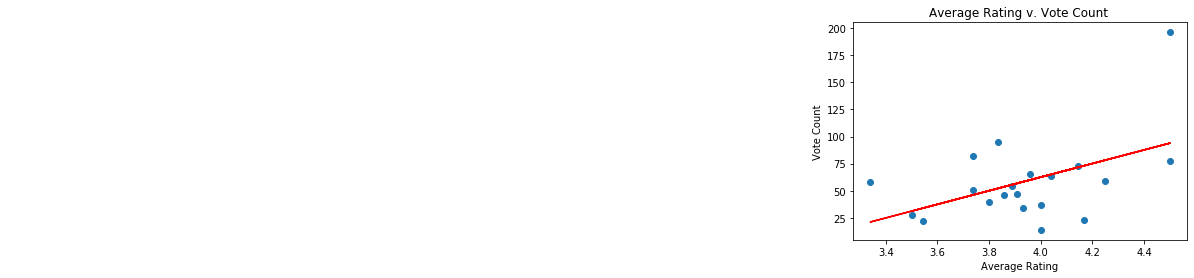

In [28]:
ratings = city_food.rating
reviews = city_food.review_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(ratings, reviews)
regress_values = ratings * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(ratings, reviews)
plt.plot(ratings, regress_values, "r-")
plt.annotate(line_eq,(0,50), fontsize=15, color='r')
plt.ylabel('Vote Count')
plt.xlabel('Average Rating')
plt.title('Average Rating v. Vote Count ')

plt.savefig('alabama_scatter.png')
plt.show()

In [29]:
variable2 = only_city.groupby['search_cuisine']
variable2

gfood = city_food.search_cuisine
gfood

TypeError: 'method' object is not subscriptable

In [30]:
specific_city = 'Albany, New York'
yelp_gb_cc_city = yelp_format_rd1[yelp_format_rd1['search_city'] == specific_city].groupby(['search_cuisine'])
yelp_gb_cc_city.head()
variable2 = yelp_gb_cc_city['review_count'].sum()
variable2

search_cuisine
American         7827
Cajun            3188
Caribbean         491
Chinese          4342
French            923
German           1490
Greek            2945
Indian           2556
Italian          4954
Japanese         5178
Korean           4668
Lebanese          851
Mediterranean    2395
Mexican          5078
Moroccan         1062
Soul             2359
Spanish           821
Thai             5370
Turkish          1042
Vietnamese       4061
Name: review_count, dtype: int64

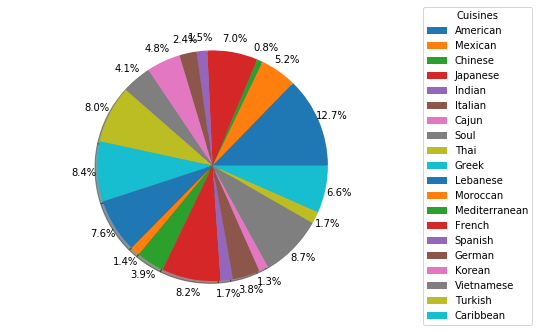

In [31]:
plt.pie(variable2, labels=None, pctdistance=1.12, autopct="%1.1f%%", shadow=True, startangle= 0)
plt.axis('equal') 
plt.tight_layout()
plt.legend(food_type,
           title="Cuisines",
          loc="center left",
         bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('nyny_cuisines.png')
plt.show()